In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart.csv')

Take a look about the dataset

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
lst = df.columns
lst

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
for i in lst:
    print(i + ': ' + str(df[i].isnull().sum()))

age: 0
sex: 0
cp: 0
trestbps: 0
chol: 0
fbs: 0
restecg: 0
thalach: 0
exang: 0
oldpeak: 0
slope: 0
ca: 0
thal: 0
target: 0


In [14]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Take a look of distribution and infor visualization

In [17]:
target = df[df['target'] == 1]
nottar = df[df['target'] == 0]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


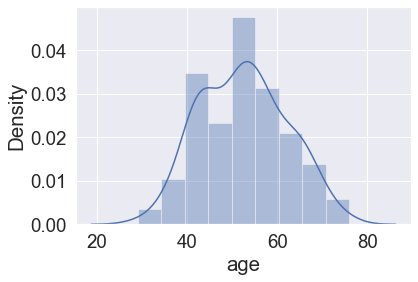

In [36]:
ax = sns.distplot(target['age'])
sns.set(font_scale = 1.7)
# We can see from the graph that age around 60 is the most target of heart attack

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:38: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(**kwargs)


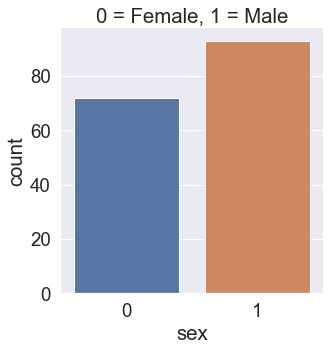

In [35]:
sns.catplot(x = 'sex', kind = 'count', data = target).set(Title = '0 = Female, 1 = Male')
plt.show()
# We can tell male is slightly more likely to have heart attack

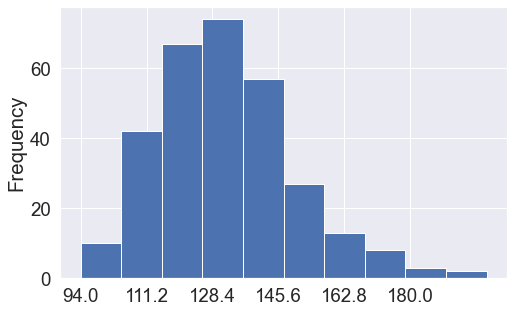

In [34]:
count, bin_edges = np.histogram(target['trestbps'], 5)
df['trestbps'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.show()

# Resting Blood Pressure between 128 - 145 is more likely to be the target

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


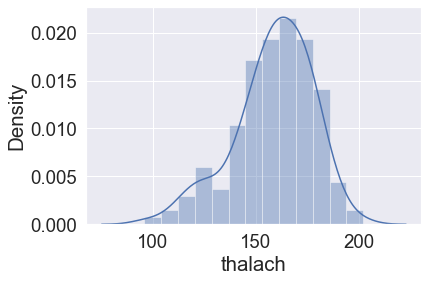

In [33]:
ax = sns.distplot(target['thalach'])
# This graph is highly normaly distributed, meaning mean, median and mode of maximum heart rate achieved 
#is close to be 155

Data Transformation

In [41]:
df['sex'] = df['sex'].astype('category').cat.codes
df['cp'] = df['cp'].astype('category').cat.codes
df['fbs'] = df['fbs'].astype('category').cat.codes
df['restecg'] = df['restecg'].astype('category').cat.codes
df['exang'] = df['exang'].astype('category').cat.codes
df['slope'] = df['slope'].astype('category').cat.codes
df['ca'] = df['ca'].astype('category').cat.codes
df['thal'] = df['thal'].astype('category').cat.codes
df['target'] = df['target'].astype('category').cat.codes

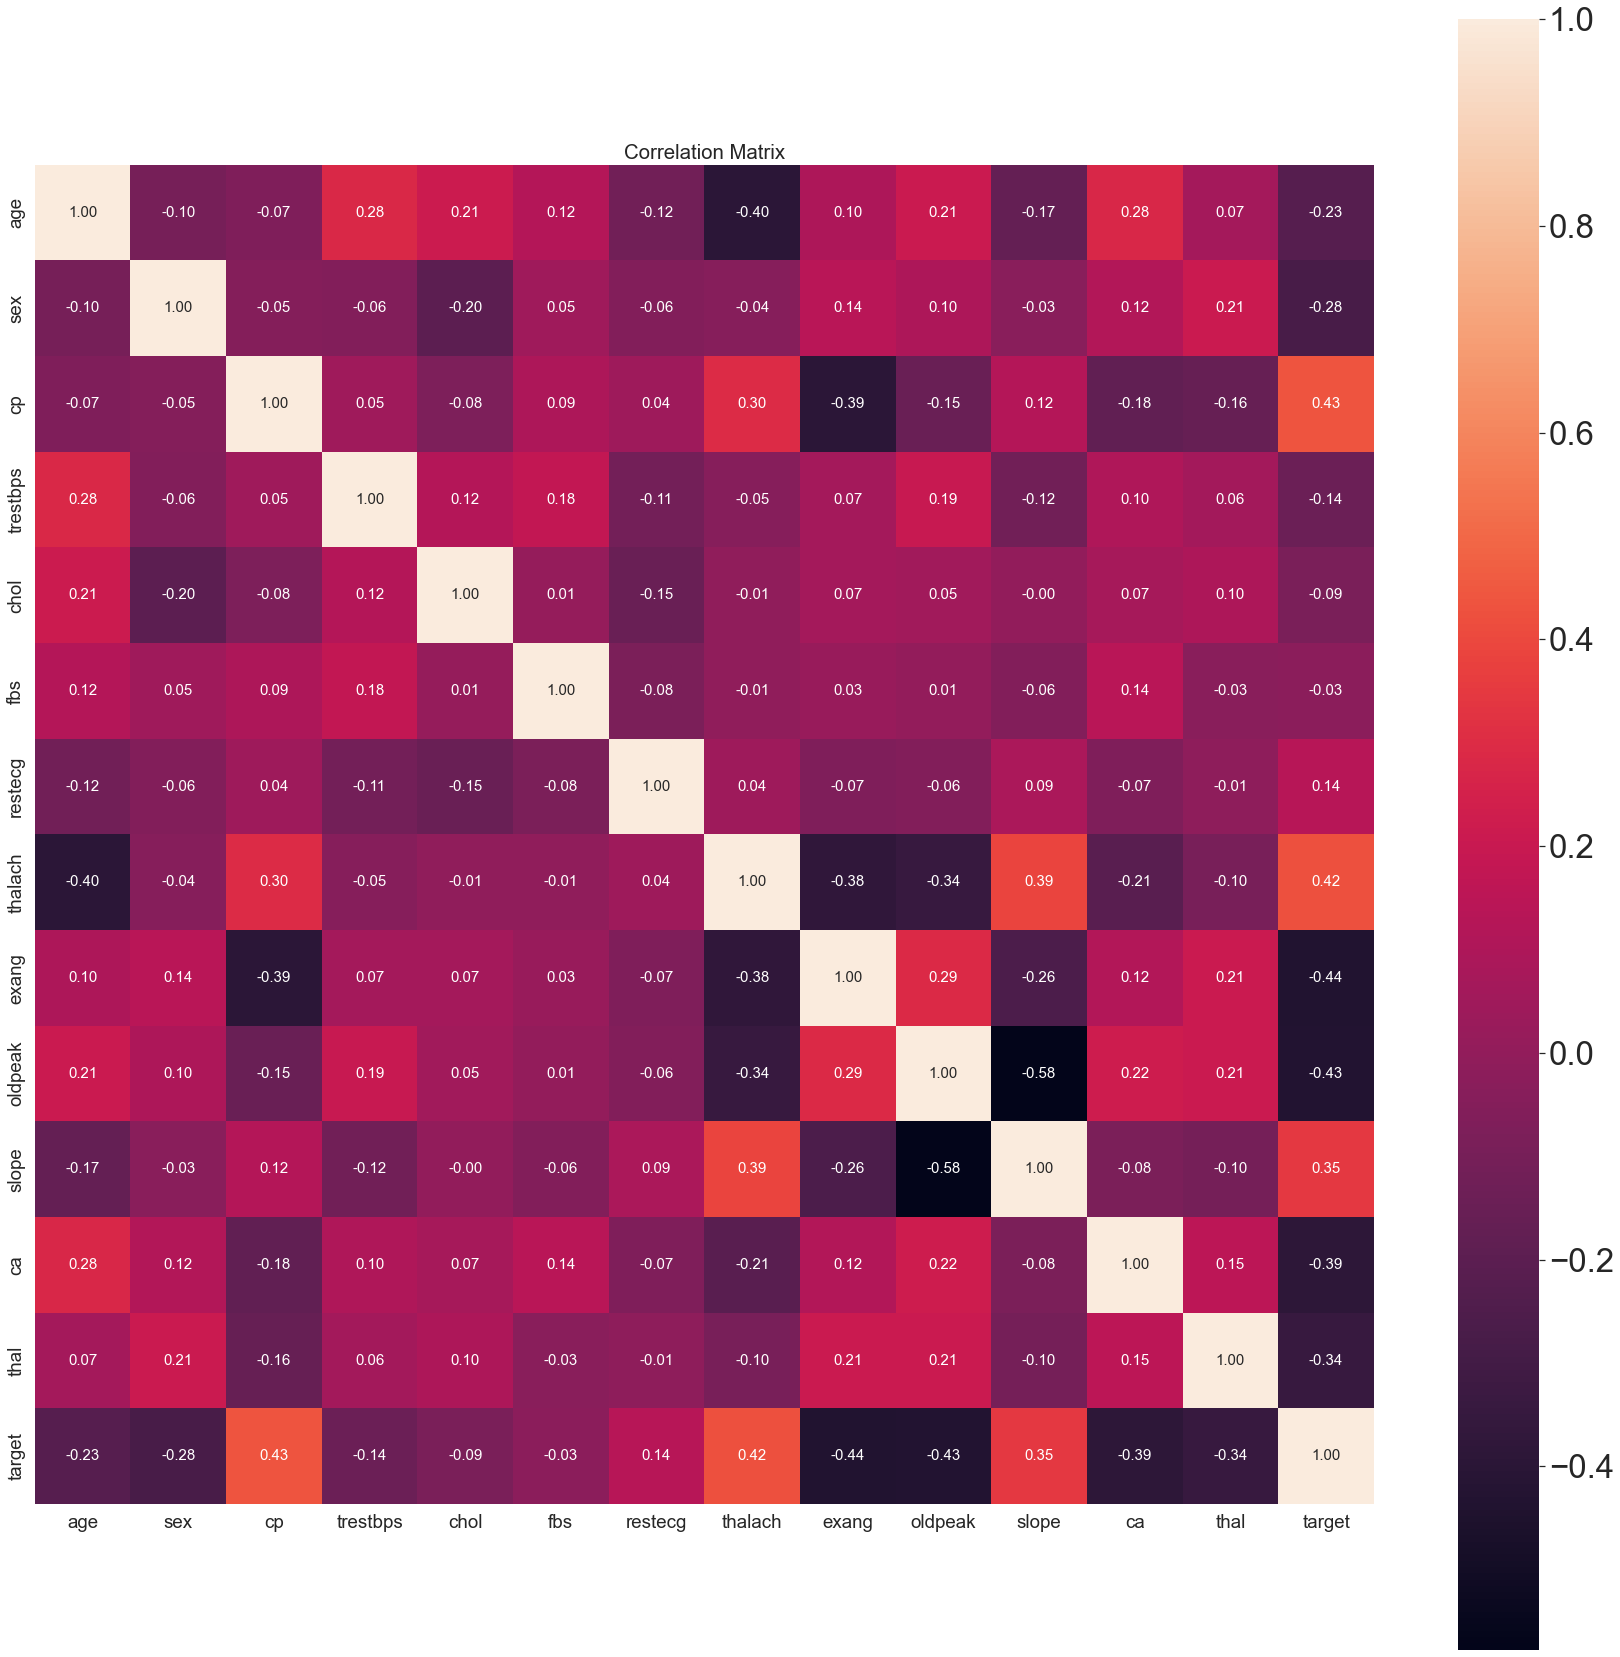

In [42]:
plt.figure(figsize=(30,30))

plt.title('Correlation Matrix')

coe_col = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
cm = np.corrcoef(df[coe_col].values.T)
sns.set(font_scale = 3)
ax = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = coe_col, 
                 xticklabels = coe_col)

Logistic Regression

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [46]:
X_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[X_columns]
Y = df['target']

In [53]:
x_train, x_test, y_train, y_test =\
    train_test_split(X, Y, test_size=0.2, random_state=0)

In [55]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [56]:
y_pred = model.predict(x_test)

In [57]:
model.score(x_train, y_train)

0.8471074380165289

In [59]:
model.score(x_test, y_test)

0.8524590163934426

In [102]:
model.coef_

array([[ 0.00684394, -1.50639274,  0.74205956, -0.00842155, -0.00377773,
        -0.3195171 ,  0.2244951 ,  0.02921268, -0.82866873, -0.53516759,
         0.2055513 , -0.85232638, -0.67671414]])

13

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

